In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

### Time-stepping solver

In [2]:
"""
Numerical solver for time-stepping method, default x range: [0, 1], default t range: [0, 100]
Boundary conditions: u(t,x=0) = 0, u(t, x=1) = 0
"""
def wave_equation_solver(ic, ic_derivative, c, delta_t, delta_x):
    mesh_x = np.linspace(0, 1, int(1/delta_x))
    mesh_t = np.linspace(0, 100, int(1/delta_t))
    n_i = len(mesh_x)
    n_k = len(mesh_t)

    u = np.zeros((n_i, n_k))

    # solve the initial boundary cases
    for i in range(n_i):
        u[i,0] = ic(mesh_x[i])
        u[i,1] = u[i,0] + delta_t * ic_derivative(mesh_x[i])

    # solve the PDE at the whole interval (finite difference method)
    for k in range(n_k-2):             # exclude the initial conditions
        for i in range(n_i-2):         # exclude the boundary conditions
            # Starting from i=0, k=0, to calculate i=2, k=2
            u_new = (c**2*delta_t**2 / delta_x**2) * (u[i+2,k+1] - 2*u[i+1,k+1] + u[i,k+1]) + 2*u[i+1,k+1] - u[i+1,k]
            u[i+1,k+2] = u_new

    return u

### Initial condition 1.
$\text{i.} \hspace{0.2cm} \Psi (x, t=0) = sin(2\pi x)$  

In [3]:
def ic_1(x):
    y = np.sin(2*np.pi * x)
    return y

def ic_deriv(x):
    y = 0
    return y

N = 1000
L = 1
delta_x = L / N
delta_t = 0.001

u_ic1 = wave_equation_solver(ic=ic_1, ic_derivative=ic_deriv, c=1, delta_t=delta_t, delta_x=delta_x)

### Initial condition 2.
$\text{ii.} \hspace{0.2cm} \Psi (x, t=0) = sin(5\pi x)$


In [4]:
def ic_2(x):
    y = np.sin(5*np.pi * x)
    return y

def ic_deriv(x):
    y = 0
    return y

N = 1000
L = 1
delta_x = L / N
delta_t = 0.001

u_ic2 = wave_equation_solver(ic=ic_2, ic_derivative=ic_deriv, c=1, delta_t=delta_t, delta_x=delta_x)

### Initial condition 3.
$\text{iii.} \hspace{0.2cm} \Psi (x, t=0) = sin(5\pi x) $ if $1/5 < x < 2/5$, else $\Psi = 0$


In [5]:
def ic_3(x):
    if x > 1/5 and x < 2/5:
        y = np.sin(5*np.pi * x)
    else:
        y = 0
    return y

def ic_deriv(x):
    y = 0
    return y

N = 1000
L = 1
delta_x = L / N
delta_t = 0.001

u_ic3 = wave_equation_solver(ic=ic_3, ic_derivative=ic_deriv, c=1, delta_t=delta_t, delta_x=delta_x)

### Draw the figure

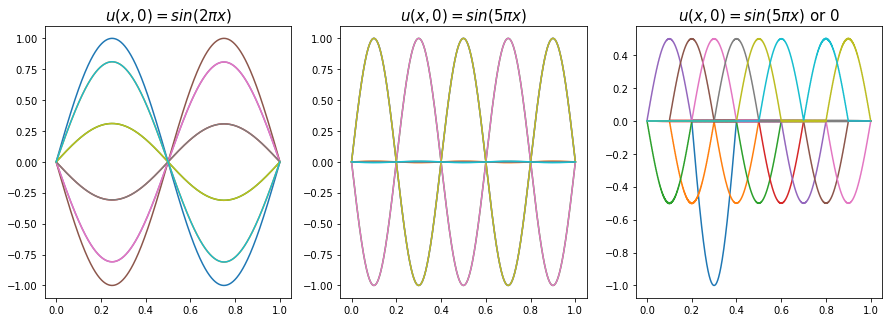

In [14]:
x_plot = np.linspace(0, 1, int(1/delta_x))
y_plot = np.linspace(0, 100, int(1/delta_t))

plt.rcParams['figure.figsize'] = (15, 5)

fig1, ax = plt.subplots(1,3)

for i in range(10):
    ax[0].plot(x_plot, u_ic1[:, 100*i])
    ax[1].plot(x_plot, u_ic2[:, 100*i])
    ax[2].plot(x_plot, u_ic3[:, 100*i])

ax[0].set_title(r'$u(x,0) = sin(2\pi x)$', fontsize=15)
ax[1].set_title(r'$u(x,0) = sin(5\pi x)$', fontsize=15)
ax[2].set_title(r'$u(x,0) = sin(5\pi x)$ or 0', fontsize=15)

plt.show()

### Animation

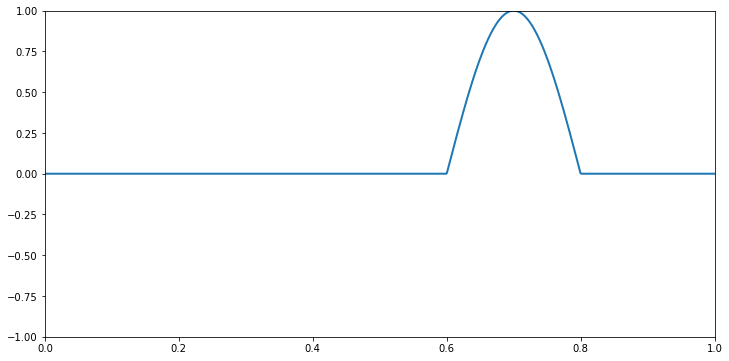

In [21]:
fig_ani = plt.figure()
plt.rcParams['figure.figsize'] = (12, 6)

ax = plt.axes(xlim=(0,1), ylim=(-1,1))

line, =ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line, 

def animate(i):
    x = np.linspace(0, 1, 1000)
    y =u_ic3[:, i]
    line.set_data(x, y)
    return line, 

anim = animation.FuncAnimation(fig_ani, animate, init_func=init, frames=1000, interval=200)

anim.save('wave equation 3.mp4', fps=30)